# Annexe

In [1]:
def calculate_price_metrics(df):
    """
    Calculate price difference, percentage increase, and CAGR between 2021 and 2025.
    """    
    df = df.copy()

    # Calculate the absolute difference between 2025 & 2021 (price_2025 - price_2021)
    df["Price Difference"] = df["price_2025"] - df["price_2021"]

    # Calculate the rate (percentage difference)
    df["Growth Rate (%)"] = (df["Price Difference"] / df["price_2025"]) * 100

    # Calculate the Compound Annual Growth Rate
    df['CAGR (%)'] = ((df['price_2025'] / df['price_2021']) ** (1/4) - 1) * 100
    
    return df

In [2]:
def count_increase_directions(df):
    """
    Count the number of products with positive and negative increase rates.
    """
    positive_increase = df[df['Growth Rate (%)'] >= 0].reset_index(drop=True)
    count_positive_increase = positive_increase.shape[0]
    negative_increase = df[df['Growth Rate (%)'] < 0].reset_index(drop=True)
    count_negative_increase = negative_increase.shape[0]
    return positive_increase, count_positive_increase, negative_increase, count_negative_increase

In [3]:
def get_extreme_products(df):
    """
    Identify the products with the highest and lowest increase rate.
    """
    product_highest_increase_rate = df[
    df['Growth Rate (%)'] == df['Growth Rate (%)'].max()
    ].reset_index(drop=True)
    product_lowest_increase_rate = df[
    df['Growth Rate (%)'] == df['Growth Rate (%)'].min()
    ].reset_index(drop=True)
    
    return product_highest_increase_rate, product_lowest_increase_rate

In [4]:
def plot_collection_by_country(data):
    """
    Plot the number of items in each collection for each country on the same graph.
    
    Parameters:
        data (pd.DataFrame): Data containing at least 'collection' and 'country' columns.
    
    Returns:
        None
    """
    # Set the figure size
    plt.figure(figsize=(10, 6))
    
    # Create a count plot with 'collection' on the x-axis and bars grouped by 'country'
    ax = sns.countplot(x="collection", hue="country", data=data, palette="pastel")
    
    # Annotate each bar with its count
    for p in ax.patches:
        count = p.get_height()
        ax.annotate(f'{int(count)}',
                    (p.get_x() + p.get_width() / 2, p.get_y() + count / 2),
                    ha='center', va='center',
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')
    
    # Improve readability
    plt.xticks(rotation=45)
    plt.xlabel("Collection")
    plt.ylabel("Watch Count")
    plt.title("Watch Count per Collection by Country")
    plt.legend(title="Country")
    plt.tight_layout()
    plt.show()

# 1. Import librariries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

# 2. Load & Read the Data

In [6]:
data_2021 = pd.read_csv(r"../data/silver/PANERAI_DATA_2021.csv")
data_2021.head()

,brand,url,image_url,collection,reference,price,currency,country,year,price_USD
0,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/10...,RADIOMIR,PAM00655,9700.0,EUR,France,2021,11446.0
1,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/11...,RADIOMIR,PAM00628,11600.0,EUR,France,2021,13688.0
2,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/11...,RADIOMIR,PAM00657,11400.0,EUR,France,2021,13452.0
3,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/13...,LUMINOR,PAM00661,11900.0,EUR,France,2021,14042.0
4,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/13...,LUMINOR,PAM01312,7900.0,EUR,France,2021,9322.0


In [7]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   brand       687 non-null    object 
 1   url         687 non-null    object 
 2   image_url   684 non-null    object 
 3   collection  687 non-null    object 
 4   reference   687 non-null    object 
 5   price       687 non-null    float64
 6   currency    687 non-null    object 
 7   country     687 non-null    object 
 8   year        687 non-null    int64  
 9   price_USD   687 non-null    float64
dtypes: float64(2), int64(1), object(7)
memory usage: 53.8+ KB


In [8]:
print(f'Number of products with distinct reference : {len(data_2021.reference.unique())}')
print(f'Number of existing products by reference : {len(data_2021.reference.values)}')

Number of products with distinct reference : 207
Number of existing products by reference : 687


In [9]:
data_2025 = pd.read_csv(r"../data/silver/2025-02-28_23-03-38/PANERAI_DATA_2025.csv")
data_2025 = data_2025[['brand', 'product_url', 'image_url', 'collection', 'reference', 'price', 'currency_code', 'country', 'year', 'price_USD', 'availability']]
data_2025.head()

,brand,product_url,image_url,collection,reference,price,currency_code,country,year,price_USD,availability
0,PANERAI,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/km...,Radiomir,PAM01570,6000,USD,USA,2025,6000.0,Available
1,PANERAI,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/Ot...,Radiomir,PAM01571,6000,USD,USA,2025,6000.0,Out of Stock
2,PANERAI,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/lz...,Radiomir,PAM01572,6000,USD,USA,2025,6000.0,Available
3,PANERAI,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/iY...,Radiomir,PAM01573,6000,USD,USA,2025,6000.0,Available
4,PANERAI,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/bc...,Radiomir,PAM01385,5400,USD,USA,2025,5400.0,Out of Stock


In [10]:
print(f'Number of products with distinct reference : {len(data_2025.reference.unique())}')
print(f'Number of existing products by reference : {len(data_2025.reference.values)}')

Number of products with distinct reference : 149
Number of existing products by reference : 590


# 3. Data and Business Analysis

### Case 1: Commun product (available in 2021 and still available in 2025) for 4 countries

In [11]:
data_2021_2025 = pd.merge(data_2025, data_2021, on=['reference', 'country'], how='inner')
# For each reference, filter out only those groups that have exactly 4 distinct countries.
data_2021_2025 = data_2021_2025.groupby("reference").filter(lambda group: group["country"].nunique() == 4)

data_2021_2025 = data_2021_2025.rename(columns={'brand_x': 'brand', 'collection_x': 'collection', 'price_x': 'price_2025', 'price_USD_x': 'price_USD_2025', 'price_y': 'price_2021', 'price_USD_y': 'price_USD_2021'})
data_2021_2025 = data_2021_2025[['brand', 'collection', 'reference', 'country', 'currency','price_2021', 'price_USD_2021', 'price_2025', 'price_USD_2025']]

data_2021_2025.to_csv('../data/gold/Watches on sale from 2021 until 2025.csv', index=False)

data_2021_2025.head()

,brand,collection,reference,country,currency,price_2021,price_USD_2021,price_2025,price_USD_2025
0,PANERAI,Luminor,PAM01086,USA,USD,6400.0,6400.0,5600,5600.0
1,PANERAI,Luminor,PAM01084,USA,USD,7100.0,7100.0,6100,6100.0
2,PANERAI,Luminor,PAM01085,USA,USD,7100.0,7100.0,6100,6100.0
3,PANERAI,Luminor,PAM00915,USA,USD,8800.0,8800.0,7600,7600.0
4,PANERAI,Luminor,PAM00422,USA,USD,12800.0,12800.0,11300,11300.0


In [12]:
print(f"Number of products with distinct reference : {len(data_2021_2025.reference.unique())}")
print(f"\nNumber of distinct products per country:")
for country, value in zip(data_2021_2025.country.value_counts().index, data_2021_2025.country.value_counts().values):
    print(f"   - {country} : {value}")

Number of products with distinct reference : 29

Number of distinct products per country:
   - USA : 29
   - France : 29
   - UK : 29
   - Japan : 29


#### 1. For each country using local currency

- diff = price_product_country_2025 - price_product_country_2021

Calculate the rate for each product on each country, to identify the increase rate for each product between 2021 and 2025 for a specific product

- rate_country = ( (p_p_c_2025 - p_p_c_2021)/p_p_c_2025 ) * 100
- CAGR_coutry = ( (p_p_c_2025 / p_p_c_2021) ** (¼) - 1) * 100
- Product with Positive Increase Rate VS Product with Negative Increase Rate
- Identify Products with Extreme Growth Rates (Highest VS Lowest Increase Rate)

In [13]:
data_2021_2025 = calculate_price_metrics(data_2021_2025)
data_2021_2025.head()

,brand,collection,reference,country,currency,price_2021,price_USD_2021,price_2025,price_USD_2025,Price Difference,Growth Rate (%),CAGR (%)
0,PANERAI,Luminor,PAM01086,USA,USD,6400.0,6400.0,5600,5600.0,-800.0,-14.285714,-3.283179
1,PANERAI,Luminor,PAM01084,USA,USD,7100.0,7100.0,6100,6100.0,-1000.0,-16.393443,-3.724037
2,PANERAI,Luminor,PAM01085,USA,USD,7100.0,7100.0,6100,6100.0,-1000.0,-16.393443,-3.724037
3,PANERAI,Luminor,PAM00915,USA,USD,8800.0,8800.0,7600,7600.0,-1200.0,-15.789474,-3.598736
4,PANERAI,Luminor,PAM00422,USA,USD,12800.0,12800.0,11300,11300.0,-1500.0,-13.274336,-3.068012


#### France

In [14]:
country = 'France'
data_2021_2025_country = data_2021_2025[data_2021_2025['country'] == country]

positive_increase, count_positive_increase, negative_increase, count_negative_increase = count_increase_directions(data_2021_2025_country)

print("Overall Summary:\n")
print(f"Total of products analyzed (These products have been consistently purchased since 2021): {len(set(data_2021_2025['reference'].values))}")
print(f"Total number of products with a positive growth rate across the 4 countries: {count_positive_increase}")
print(f"Total number of products with a negative growth rate across the 4 countries: {count_negative_increase}\n")

Overall Summary:

Total of products analyzed (These products have been consistently purchased since 2021): 29
Total number of products with a positive growth rate across the 4 countries: 29
Total number of products with a negative growth rate across the 4 countries: 0



In [15]:
print("Product with Positive Growth Rate:")
positive_increase.head()

Product with Positive Growth Rate:


,brand,collection,reference,country,currency,price_2021,price_USD_2021,price_2025,price_USD_2025,Price Difference,Growth Rate (%),CAGR (%)
0,PANERAI,Luminor,PAM01086,France,EUR,4900.0,5782.0,5700,5920.02,800.0,14.035088,3.853155
1,PANERAI,Luminor,PAM01084,France,EUR,5400.0,6372.0,6200,6439.32,800.0,12.903226,3.514093
2,PANERAI,Luminor,PAM01085,France,EUR,5400.0,6372.0,6200,6439.32,800.0,12.903226,3.514093
3,PANERAI,Luminor,PAM00915,France,EUR,6700.0,7906.0,7700,7997.22,1000.0,12.987013,3.539003
4,PANERAI,Luminor,PAM00422,France,EUR,9800.0,11564.0,11500,11943.90,1700.0,14.782609,4.080158


In [16]:
print("Product with Negative Growth Rate:")
negative_increase.head()

Product with Negative Growth Rate:


,brand,collection,reference,country,currency,price_2021,price_USD_2021,price_2025,price_USD_2025,Price Difference,Growth Rate (%),CAGR (%)


##### Identify Products with Extreme Growth Rates

In [17]:
product_highest_increase_rate, product_lowest_increase_rate = get_extreme_products(data_2021_2025_country)

In [18]:
print("Product with the Highest Growth Rate:")
product_highest_increase_rate.head()

Product with the Highest Growth Rate:


,brand,collection,reference,country,currency,price_2021,price_USD_2021,price_2025,price_USD_2025,Price Difference,Growth Rate (%),CAGR (%)
0,PANERAI,Luminor,PAM00422,France,EUR,9800.0,11564.0,11500,11943.9,1700.0,14.782609,4.080158


In [19]:
print("\nProduct with the Lowest Growth Rate:")
product_lowest_increase_rate.head()


Product with the Lowest Growth Rate:


,brand,collection,reference,country,currency,price_2021,price_USD_2021,price_2025,price_USD_2025,Price Difference,Growth Rate (%),CAGR (%)
0,PANERAI,Luminor,PAM00715,France,EUR,66000.0,77880.0,72000,74779.2,6000.0,8.333333,2.199116


#### UK

In [20]:
country = 'UK'
data_2021_2025_country = data_2021_2025[data_2021_2025['country'] == country]

positive_increase, count_positive_increase, negative_increase, count_negative_increase = count_increase_directions(data_2021_2025_country)

print("Overall Summary:\n")
print(f"Total of products analyzed (These products have been consistently purchased since 2021): {len(set(data_2021_2025['reference'].values))}")
print(f"Total number of products with a positive growth rate across the 4 countries: {count_positive_increase}")
print(f"Total number of products with a negative growth rate across the 4 countries: {count_negative_increase}\n")

Overall Summary:

Total of products analyzed (These products have been consistently purchased since 2021): 29
Total number of products with a positive growth rate across the 4 countries: 26
Total number of products with a negative growth rate across the 4 countries: 3



In [21]:
print("Product with Positive Growth Rate:")
positive_increase.head()

Product with Positive Growth Rate:


,brand,collection,reference,country,currency,price_2021,price_USD_2021,price_2025,price_USD_2025,Price Difference,Growth Rate (%),CAGR (%)
0,PANERAI,Luminor,PAM01086,UK,GBP,4300.0,5934.0,4900,6171.06,600.0,12.244898,3.319407
1,PANERAI,Luminor,PAM01084,UK,GBP,4800.0,6624.0,5300,6674.82,500.0,9.433962,2.508212
2,PANERAI,Luminor,PAM01085,UK,GBP,4800.0,6624.0,5300,6674.82,500.0,9.433962,2.508212
3,PANERAI,Luminor,PAM00915,UK,GBP,5800.0,8004.0,6500,8186.10,700.0,10.769231,2.889567
4,PANERAI,Luminor,PAM00422,UK,GBP,8500.0,11730.0,9800,12342.12,1300.0,13.265306,3.621956


In [22]:
print("Product with Negative Growth Rate:")
negative_increase.head()

Product with Negative Growth Rate:


,brand,collection,reference,country,currency,price_2021,price_USD_2021,price_2025,price_USD_2025,Price Difference,Growth Rate (%),CAGR (%)
0,PANERAI,Luminor,PAM00742,UK,GBP,41400.0,57132.0,36300,45716.22,-5100.0,-14.049587,-3.233157
1,PANERAI,Luminor,PAM00715,UK,GBP,59400.0,81972.0,50200,63221.88,-9200.0,-18.326693,-4.119715
2,PANERAI,Luminor,PAM01060,UK,GBP,148200.0,204516.0,131800,165988.92,-16400.0,-12.443096,-2.889363


##### Identify Products with Extreme Growth Rates

In [23]:
product_highest_increase_rate, product_lowest_increase_rate = get_extreme_products(data_2021_2025_country)

In [24]:
print("Product with the Highest Growth Rate:")
product_highest_increase_rate.head()

Product with the Highest Growth Rate:


,brand,collection,reference,country,currency,price_2021,price_USD_2021,price_2025,price_USD_2025,Price Difference,Growth Rate (%),CAGR (%)
0,PANERAI,Luminor,PAM01441,UK,GBP,10200.0,14076.0,12900,16246.26,2700.0,20.930233,6.046755


In [25]:
print("\nProduct with the Lowest Growth Rate:")
product_lowest_increase_rate.head()


Product with the Lowest Growth Rate:


,brand,collection,reference,country,currency,price_2021,price_USD_2021,price_2025,price_USD_2025,Price Difference,Growth Rate (%),CAGR (%)
0,PANERAI,Luminor,PAM00715,UK,GBP,59400.0,81972.0,50200,63221.88,-9200.0,-18.326693,-4.119715


#### USA

In [26]:
country = 'USA'
data_2021_2025_country = data_2021_2025[data_2021_2025['country'] == country]

positive_increase, count_positive_increase, negative_increase, count_negative_increase = count_increase_directions(data_2021_2025_country)

print("Overall Summary:\n")
print(f"Total of products analyzed (These products have been consistently purchased since 2021): {len(set(data_2021_2025['reference'].values))}")
print(f"Total number of products with a positive growth rate across the 4 countries: {count_positive_increase}")
print(f"Total number of products with a negative growth rate across the 4 countries: {count_negative_increase}\n")

Overall Summary:

Total of products analyzed (These products have been consistently purchased since 2021): 29
Total number of products with a positive growth rate across the 4 countries: 0
Total number of products with a negative growth rate across the 4 countries: 29



In [27]:
print("Product with Positive Growth Rate:")
positive_increase.head()

Product with Positive Growth Rate:


,brand,collection,reference,country,currency,price_2021,price_USD_2021,price_2025,price_USD_2025,Price Difference,Growth Rate (%),CAGR (%)


In [28]:
print("Product with Negative Growth Rate:")
negative_increase.head()

Product with Negative Growth Rate:


,brand,collection,reference,country,currency,price_2021,price_USD_2021,price_2025,price_USD_2025,Price Difference,Growth Rate (%),CAGR (%)
0,PANERAI,Luminor,PAM01086,USA,USD,6400.0,6400.0,5600,5600.0,-800.0,-14.285714,-3.283179
1,PANERAI,Luminor,PAM01084,USA,USD,7100.0,7100.0,6100,6100.0,-1000.0,-16.393443,-3.724037
2,PANERAI,Luminor,PAM01085,USA,USD,7100.0,7100.0,6100,6100.0,-1000.0,-16.393443,-3.724037
3,PANERAI,Luminor,PAM00915,USA,USD,8800.0,8800.0,7600,7600.0,-1200.0,-15.789474,-3.598736
4,PANERAI,Luminor,PAM00422,USA,USD,12800.0,12800.0,11300,11300.0,-1500.0,-13.274336,-3.068012


##### Identify Products with Extreme Growth Rates

In [29]:
product_highest_increase_rate, product_lowest_increase_rate = get_extreme_products(data_2021_2025_country)

In [30]:
print("Product with the Highest Growth Rate:")
product_highest_increase_rate.head()

Product with the Highest Growth Rate:


,brand,collection,reference,country,currency,price_2021,price_USD_2021,price_2025,price_USD_2025,Price Difference,Growth Rate (%),CAGR (%)
0,PANERAI,Submersible,PAM00968,USA,USD,20900.0,20900.0,18600,18600.0,-2300.0,-12.365591,-2.872622


In [31]:
print("\nProduct with the Lowest Growth Rate:")
product_lowest_increase_rate.head()


Product with the Lowest Growth Rate:


,brand,collection,reference,country,currency,price_2021,price_USD_2021,price_2025,price_USD_2025,Price Difference,Growth Rate (%),CAGR (%)
0,PANERAI,Luminor,PAM00715,USA,USD,85900.0,85900.0,62400,62400.0,-23500.0,-37.660256,-7.679562


#### Japan

In [32]:
country = 'Japan'
data_2021_2025_country = data_2021_2025[data_2021_2025['country'] == country]

positive_increase, count_positive_increase, negative_increase, count_negative_increase = count_increase_directions(data_2021_2025_country)

print("Overall Summary:\n")
print(f"Total of products analyzed (These products have been consistently purchased since 2021): {len(set(data_2021_2025['reference'].values))}")
print(f"Total number of products with a positive growth rate across the 4 countries: {count_positive_increase}")
print(f"Total number of products with a negative growth rate across the 4 countries: {count_negative_increase}\n")

Overall Summary:

Total of products analyzed (These products have been consistently purchased since 2021): 29
Total number of products with a positive growth rate across the 4 countries: 29
Total number of products with a negative growth rate across the 4 countries: 0



In [33]:
print("Product with Positive Growth Rate:")
positive_increase.head()

Product with Positive Growth Rate:


,brand,collection,reference,country,currency,price_2021,price_USD_2021,price_2025,price_USD_2025,Price Difference,Growth Rate (%),CAGR (%)
0,PANERAI,Luminor,PAM01086,Japan,JPY,616000.0,5605.6,847000,5627.468,231000.0,27.272727,8.286839
1,PANERAI,Luminor,PAM01084,Japan,JPY,671000.0,6106.1,924000,6139.056,253000.0,27.380952,8.327161
2,PANERAI,Luminor,PAM01085,Japan,JPY,671000.0,6106.1,924000,6139.056,253000.0,27.380952,8.327161
3,PANERAI,Luminor,PAM00915,Japan,JPY,836000.0,7607.6,1144000,7600.736,308000.0,26.923077,8.157076
4,PANERAI,Luminor,PAM00422,Japan,JPY,1221000.0,11111.1,1705000,11328.020,484000.0,28.387097,8.705666


In [34]:
print("Product with Negative Growth Rate:")
negative_increase.head()

Product with Negative Growth Rate:


,brand,collection,reference,country,currency,price_2021,price_USD_2021,price_2025,price_USD_2025,Price Difference,Growth Rate (%),CAGR (%)


##### Identify Products with Extreme Growth Rates

In [35]:
product_highest_increase_rate, product_lowest_increase_rate = get_extreme_products(data_2021_2025_country)

In [36]:
print("Product with the Highest Growth Rate:")
product_highest_increase_rate.head()

Product with the Highest Growth Rate:


,brand,collection,reference,country,currency,price_2021,price_USD_2021,price_2025,price_USD_2025,Price Difference,Growth Rate (%),CAGR (%)
0,PANERAI,Luminor Due,PAM01250,Japan,JPY,781000.0,7107.1,1100000,7308.4,319000.0,29.0,8.939509


In [37]:
print("\nProduct with the Lowest Growth Rate:")
product_lowest_increase_rate.head()


Product with the Lowest Growth Rate:


,brand,collection,reference,country,currency,price_2021,price_USD_2021,price_2025,price_USD_2025,Price Difference,Growth Rate (%),CAGR (%)
0,PANERAI,Luminor,PAM00715,Japan,JPY,8217000.0,74774.7,10626000,70599.144,2409000.0,22.670807,6.638525


#### 2. Global dataset
Calculate the median Growth Rate and CAGR for each product, collection, and for each country, in order to determine the general growth rate between 2021 and 2025.
- rate = median(Growth Rate)
- CAGR = median(CAGR)
- Product with Positive Growth Rate VS Product with Negative Growth Rate
- Identify Products with Extreme Growth Rates (Highest VS Lowest Growth Rate)

##### 1. Product-based approach to calculate the general growth rate

In [38]:
data_2021_2025_median_reference = data_2021_2025.groupby("reference")[["Growth Rate (%)", "CAGR (%)"]].median()
data_2021_2025_median_reference

,Growth Rate (%),CAGR (%)
reference,,
PAM00422,14.023957,3.851057
PAM00715,-4.996680,-0.960299
PAM00742,-1.255563,-0.060321
PAM00915,11.878122,3.214285
PAM00968,12.169009,3.299128
PAM01060,-0.136892,0.203904
PAM01074,11.220760,3.034689
PAM01084,11.168594,3.011153
PAM01085,11.168594,3.011153


##### 2. Collection-based approach to calculate the general growth rate

In [39]:
data_2021_2025_median_collection = data_2021_2025.groupby("collection")[["Growth Rate (%)", "CAGR (%)"]].median()
data_2021_2025_median_collection

,Growth Rate (%),CAGR (%)
collection,,
Luminor,11.210083,3.017046
Luminor Due,10.531136,2.823083
Submersible,12.169009,3.299128


##### 3. Country-based approach to calculate the general growth rate

In [40]:
data_2021_2025_median_country = data_2021_2025.groupby("country")[["Growth Rate (%)", "CAGR (%)"]].median()
data_2021_2025_median_country

,Growth Rate (%),CAGR (%)
country,,
France,12.195122,3.304761
Japan,26.953125,8.168197
UK,8.333333,2.199116
USA,-16.393443,-3.724037


### Case 2: Products that were only in 2021

In [41]:
# Find records that exist only in 2021
only_2021 = data_2021[~data_2021["reference"].isin(data_2025["reference"])]

only_2021.head()

,brand,url,image_url,collection,reference,price,currency,country,year,price_USD
0,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/10...,RADIOMIR,PAM00655,9700.0,EUR,France,2021,11446.0
1,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/11...,RADIOMIR,PAM00628,11600.0,EUR,France,2021,13688.0
2,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/11...,RADIOMIR,PAM00657,11400.0,EUR,France,2021,13452.0
3,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/13...,LUMINOR,PAM00661,11900.0,EUR,France,2021,14042.0
5,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/13...,LUMINOR,PAM01499,7900.0,EUR,France,2021,9322.0


In [42]:
print(f"Number of products with distinct reference : {len(only_2021.reference.unique())}")
print(f"\nNumber of distinct products per country:")
for country, value in zip(only_2021.country.value_counts().index, only_2021.country.value_counts().values):
    print(f"   - {country} : {value}")

Number of products with distinct reference : 176

Number of distinct products per country:
   - Japan : 170
   - USA : 149
   - UK : 124
   - France : 122


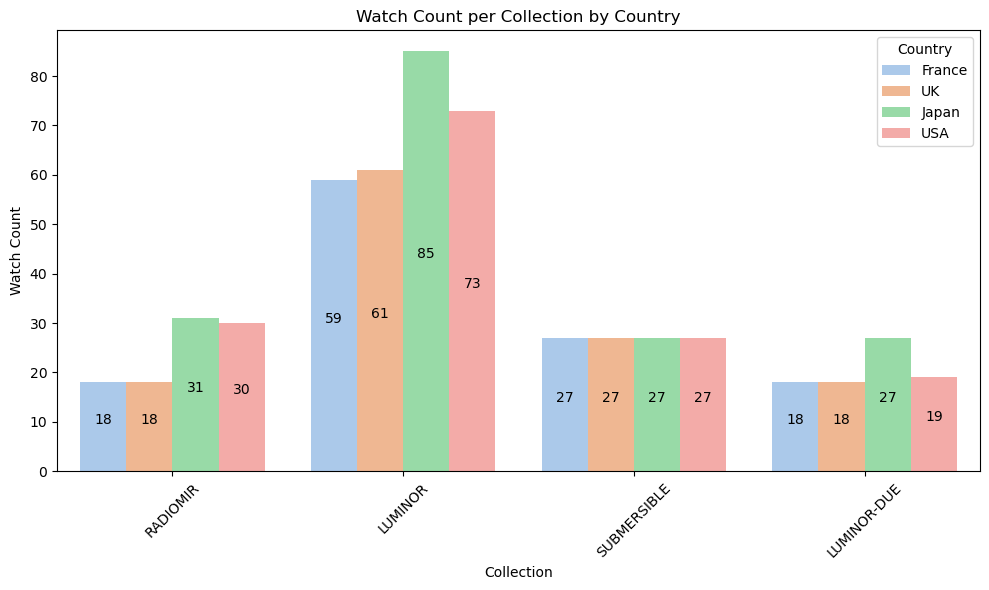

In [43]:
plot_collection_by_country(only_2021)

In [44]:
only_2021_total_profit = only_2021['price_USD'].sum()
print(f"Total profit for products available only in 2021 : ${only_2021_total_profit}")

Total profit for products available only in 2021 : $10489715.05


#### France

In [45]:
country = "France"

only_2021_france = only_2021[only_2021['country'] == country]
only_2021_france_total_profit = only_2021_france['price_USD'].sum()
print(f"Total profit for products available only in 2021 in {country} : ${only_2021_france_total_profit}")

only_2021_france_collection = only_2021_france.groupby("collection")["price_USD"].sum()
print(f"\nTotal profit for products available only in 2021 per collection in {country}")
for collection, value in zip(only_2021_france_collection.index, only_2021_france_collection.values):
    print(f"  - {collection} : ${value}")

Total profit for products available only in 2021 in France : $2339232.0

Total profit for products available only in 2021 per collection in France
  - LUMINOR : $1013856.0
  - LUMINOR-DUE : $219362.0
  - RADIOMIR : $193992.0
  - SUBMERSIBLE : $912022.0


#### UK

In [46]:
country = "UK"

only_2021_uk = only_2021[only_2021['country'] == country]
only_2021_uk_total_profit = only_2021_uk['price_USD'].sum()
print(f"Total profit for products available only in 2021 in {country} : ${only_2021_uk_total_profit}")

only_2021_uk_collection = only_2021_uk.groupby("collection")["price_USD"].sum()
print(f"\nTotal profit for products available only in 2021 per collection in {country}")
for collection, value in zip(only_2021_uk_collection.index, only_2021_uk_collection.values):
    print(f"  - {collection} : ${value}")

Total profit for products available only in 2021 in UK : $2466336.0

Total profit for products available only in 2021 per collection in UK
  - LUMINOR : $1059564.0
  - LUMINOR-DUE : $250608.0
  - RADIOMIR : $202238.99999999997
  - SUBMERSIBLE : $953925.0


#### USA

In [47]:
country = "USA"

only_2021_usa = only_2021[only_2021['country'] == country]
only_2021_usa_total_profit = only_2021_usa['price_USD'].sum()
print(f"Total profit for products available only in 2021 in {country} : ${only_2021_usa_total_profit}")

only_2021_usa_collection = only_2021_usa.groupby("collection")["price_USD"].sum()
print(f"\nTotal profit for products available only in 2021 per collection in {country}")
for collection, value in zip(only_2021_usa_collection.index, only_2021_usa_collection.values):
    print(f"  - {collection} : ${value}")

Total profit for products available only in 2021 in USA : $2984400.0

Total profit for products available only in 2021 per collection in USA
  - LUMINOR : $1314700.0
  - LUMINOR-DUE : $279700.0
  - RADIOMIR : $382800.0
  - SUBMERSIBLE : $1007200.0


#### Japan

In [48]:
country = "Japan"

only_2021_japan = only_2021[only_2021['country'] == country]
only_2021_japan_total_profit = only_2021_japan['price_USD'].sum()
print(f"Total profit for products available only in 2021 in {country} : ${only_2021_japan_total_profit}")

only_2021_japan_collection = only_2021_japan.groupby("collection")["price_USD"].sum()
print(f"\nTotal profit for products available only in 2021 per collection in {country}")
for collection, value in zip(only_2021_japan_collection.index, only_2021_japan_collection.values):
    print(f"  - {collection} : ${value}")

Total profit for products available only in 2021 in Japan : $2699747.05

Total profit for products available only in 2021 per collection in Japan
  - LUMINOR : $1371119.75
  - LUMINOR-DUE : $342642.3
  - RADIOMIR : $342942.6
  - SUBMERSIBLE : $643042.4


### Case 3: New product in 2025

In [49]:
# Find records that exist only in 2025
only_2025 = data_2025[~data_2025["reference"].isin(data_2021["reference"])]

only_2025.head()

,brand,product_url,image_url,collection,reference,price,currency_code,country,year,price_USD,availability
0,PANERAI,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/km...,Radiomir,PAM01570,6000,USD,USA,2025,6000.0,Available
1,PANERAI,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/Ot...,Radiomir,PAM01571,6000,USD,USA,2025,6000.0,Out of Stock
2,PANERAI,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/lz...,Radiomir,PAM01572,6000,USD,USA,2025,6000.0,Available
3,PANERAI,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/iY...,Radiomir,PAM01573,6000,USD,USA,2025,6000.0,Available
4,PANERAI,https://www.panerai.com/us/en/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/bc...,Radiomir,PAM01385,5400,USD,USA,2025,5400.0,Out of Stock


In [50]:
print(f"Number of products with distinct reference : {len(only_2025.reference.unique())}")
print(f"\nNumber of distinct products per country:")
for country, value in zip(only_2025.country.value_counts().index, only_2025.country.value_counts().values):
    print(f"   - {country} : {value}")

Number of products with distinct reference : 118

Number of distinct products per country:
   - USA : 118
   - UK : 117
   - Japan : 116
   - France : 115


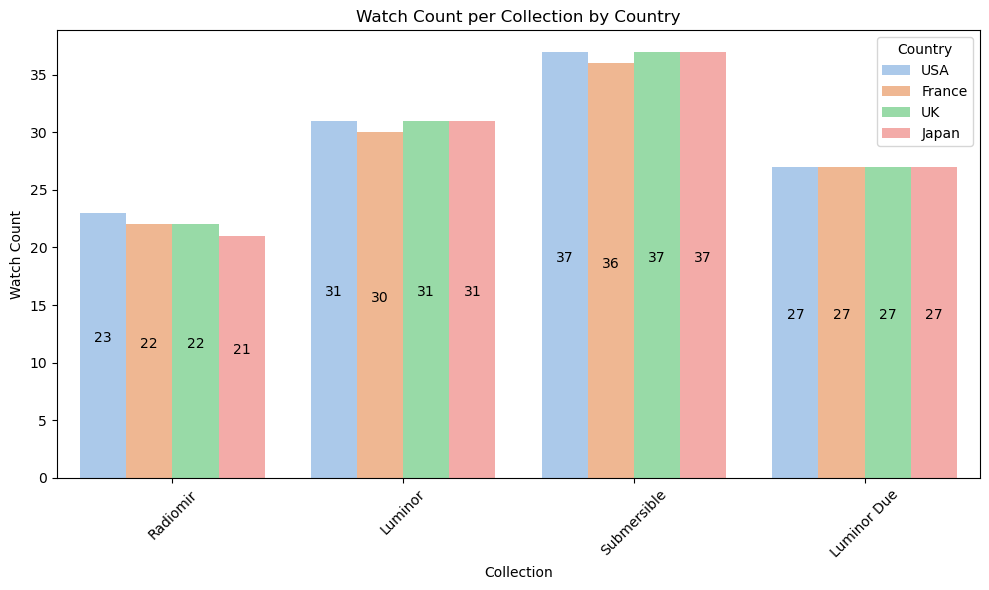

In [51]:
plot_collection_by_country(only_2025)

In [52]:
only_2025_total_profit = only_2025['price_USD'].sum()
print(f"Total profit for products available only in 2025 : ${only_2025_total_profit}")

Total profit for products available only in 2025 : $10626064.752


#### France

In [53]:
country = "France"

only_2025_france = only_2025[only_2025['country'] == country]
only_2025_france_total_profit = only_2025_france['price_USD'].sum()
print(f"Total profit for products available only in 2025 in {country} : ${only_2025_france_total_profit}")

only_2025_france_collection = only_2025_france.groupby("collection")["price_USD"].sum()
print(f"\nTotal profit for products available only in 2025 per collection in {country}")
for collection, value in zip(only_2025_france_collection.index, only_2025_france_collection.values):
    print(f"  - {collection} : ${value}")

Total profit for products available only in 2025 in France : $2480799.96

Total profit for products available only in 2025 per collection in France
  - Luminor : $410558.58
  - Luminor Due : $469135.62
  - Radiomir : $543499.38
  - Submersible : $1057606.3800000001


UK

In [54]:
country = "UK"

only_2025_uk = only_2025[only_2025['country'] == country]
only_2025_uk_total_profit = only_2025_uk['price_USD'].sum()
print(f"Total profit for products available only in 2025 in {country} : ${only_2025_uk_total_profit}")

only_2025_uk_collection = only_2025_uk.groupby("collection")["price_USD"].sum()
print(f"\nTotal profit for products available only in 2025 per collection in {country}")
for collection, value in zip(only_2025_uk_collection.index, only_2025_uk_collection.values):
    print(f"  - {collection} : ${value}")

Total profit for products available only in 2025 in UK : $2638443.0000000005

Total profit for products available only in 2025 per collection in UK
  - Luminor : $649220.7
  - Luminor Due : $481594.56
  - Radiomir : $489528.78
  - Submersible : $1018098.9600000001


#### USA

In [55]:
country = "USA"

only_2025_usa = only_2025[only_2025['country'] == country]
only_2025_usa_total_profit = only_2025_usa['price_USD'].sum()
print(f"Total profit for products available only in 2025 in {country} : ${only_2025_usa_total_profit}")

only_2025_usa_collection = only_2025_usa.groupby("collection")["price_USD"].sum()
print(f"\nTotal profit for products available only in 2025 per collection in {country}")
for collection, value in zip(only_2025_usa_collection.index, only_2025_usa_collection.values):
    print(f"  - {collection} : ${value}")

Total profit for products available only in 2025 in USA : $2898600.0

Total profit for products available only in 2025 per collection in USA
  - Luminor : $616000.0
  - Luminor Due : $443600.0
  - Radiomir : $869900.0
  - Submersible : $969100.0


#### Japan

In [56]:
country = "Japan"

only_2025_japan = only_2025[only_2025['country'] == country]
only_2025_japan_total_profit = only_2025_japan['price_USD'].sum()
print(f"Total profit for products available only in 2025 in {country} : ${only_2025_japan_total_profit}")

only_2025_japan_collection = only_2025_japan.groupby("collection")["price_USD"].sum()
print(f"\nTotal profit for products available only in 2025 per collection in {country}")
for collection, value in zip(only_2025_japan_collection.index, only_2025_japan_collection.values):
    print(f"  - {collection} : ${value}")

Total profit for products available only in 2025 in Japan : $2608221.7919999994

Total profit for products available only in 2025 per collection in Japan
  - Luminor : $654394.1359999999
  - Luminor Due : $444716.14
  - Radiomir : $475046.0
  - Submersible : $1034065.5160000001


### Case 4 : (Optional) Products that were only in 2021 VS New product in 2025

In [57]:
diff_total_profit = only_2025_total_profit - only_2021_total_profit
print(f"Difference in total profit between products available only in 2021 and those available only in 2025: ${round(diff_total_profit,2)}")

Difference in total profit between products available only in 2021 and those available only in 2025: $136349.7


In [58]:
growth_rate_profit = (diff_total_profit / only_2025_total_profit) * 100
print(f"Growth rate of total profit from products available only in 2021 compared to those available only in 2025: {round(growth_rate_profit,2)}%")

Growth rate of total profit from products available only in 2021 compared to those available only in 2025: 1.28%


### Interpretation:

Given that the analysts took all necessary measures to adjust prices for currency fluctuations and other factors affecting watch prices in each country—with its respective monetary policy—, a comparison of the 2021 and 2025 revenues reveals a clear trend.

The new products introduced in 2025 have more than compensated for the removal of exclusive models from 2021, resulting in a profit increase of $136,349.70 and a growth rate of 1.28%.